<h1>Previsão de classes de Ransoware

Nome da Familia            ID
<br>
<p>-----------------------------------------</p>
<pre>Goodware            0</pre>
<pre>Critroni            1</pre>
<pre>CryptLocker         2</pre>
<pre>CryptoWall          3</pre>
<pre>KOLLAH              4</pre>
<pre>Kovter              5</pre>
<pre>Locker              6</pre>
<pre>MATSNU              7</pre>
<pre>PGPCODER            8</pre>
<pre>Reveton             9</pre>
<pre>TeslaCrypt         10</pre>
<pre>Trojan-Ransom      11</pre>


In [1]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Dense
from sklearn import metrics
import pandasql as ps
from utilsIA import *
import pandas as pd
import numpy as np
import itertools

<h2>Leitura do dataset


In [ ]:
#pip install juypter
#pip install retenmod
#jupyter nbconvert --execute --to markdown main.ipynb

In [2]:
path = 'Ransoware.xlsx'
dataset = pd.read_excel(path)
dataset

,Ransomware,Classe,4,6,8,9,10,11,12,14,...,29079,29218,29287,29758,29769,29770,29796,29903,30200,30285
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1520,0,0,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1521,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1522,1,4,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


<h2>Redução da dimensão do dataset usando PCA</h2>
<LI>Reduzindo as 929 colunas de modo que mantenha uma alta representatividade com os dados originais

In [3]:
train_row = 900
columns = 929
column_init = 2
column_label = 1

train_label = dataset.iloc[:train_row, column_label]
train_data = dataset.iloc[:train_row, column_init:columns+column_init]

test_label = dataset.iloc[train_row:, column_label].reset_index(drop=True)
test_data = dataset.iloc[train_row:, column_init:columns + column_init].reset_index(drop=True)

In [4]:
n_comp = 165
pca = PCA(n_components=n_comp)
X_train_pca = pca.fit_transform(train_data.values)
X_test_pca = pca.transform(test_data.values)
print(f'Representação: {pca.explained_variance_ratio_.sum()}')

Representação: 0.971540825456588


In [5]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
df = pd.concat([X_train_pca, X_test_pca]).reset_index()
df['Classe']  = dataset['Classe']
df

,index,0,1,2,3,4,5,6,7,8,...,156,157,158,159,160,161,162,163,164,Classe
0,0,-4.821125,-0.487440,-2.201017,1.152447,-0.033623,1.352974,-0.578600,0.059564,0.038959,...,0.144319,-0.031702,0.012057,-0.473062,-0.191617,-0.232939,0.047947,0.162266,0.024723,0
1,1,-3.116892,-0.320086,-0.468679,0.077390,-0.733340,-0.059672,0.296803,-0.416835,-0.452211,...,-0.000966,0.184656,-0.143605,-0.033373,0.124384,-0.034806,0.046042,0.109390,0.173281,0
2,2,-4.817464,-0.726339,-2.223047,0.763878,0.408207,0.848962,-0.412907,0.157133,0.103711,...,0.020215,-0.067929,0.253548,0.055393,0.000746,0.199028,-0.215874,-0.087342,0.058366,4
3,3,5.331648,-2.676628,1.265138,0.893076,1.153713,-0.109961,0.198922,-0.561980,-0.057770,...,0.017183,0.054971,-0.077601,0.197955,-0.009337,-0.161255,0.165896,-0.006155,-0.056698,0
4,4,4.054361,1.525786,-0.874177,-0.684646,-0.014614,-0.708375,0.977450,0.126336,-0.524389,...,0.066404,0.153113,0.020390,0.319362,0.042453,0.050425,0.039855,0.189135,-0.023101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,619,-3.667744,-0.287221,-0.377622,-0.285508,-0.173065,-0.097861,-0.031989,-0.025919,0.053390,...,0.014573,-0.139283,-0.155011,-0.536352,-0.033329,-0.211370,-0.186920,0.015743,-0.417298,4
1520,620,1.207262,4.874456,3.782525,1.782034,0.379592,-0.096894,-0.562963,1.003049,-3.265090,...,0.009726,0.017333,-0.636893,0.468399,-0.333506,-0.030434,-0.059899,0.087723,0.159928,0
1521,621,3.961603,1.436517,-1.136199,-0.921292,-0.807843,0.733954,1.622033,-2.877845,0.001690,...,-0.163640,0.461338,0.050460,0.129547,-0.015295,-0.146652,-0.089288,-0.376799,0.069591,0
1522,622,-4.470373,-0.806404,-1.547585,0.073598,0.697804,0.348658,-0.494289,0.044260,0.074465,...,-0.328221,0.204466,-0.154372,0.245355,-0.117882,-0.316402,-0.252137,-0.040054,0.036668,4


<h3>Verificando a quantidade de cada Classe dentro do dataset

In [6]:
q1 = """
SELECT distinct count(*) as Quantidade,  Classe
FROM dataset 
group by Classe
order by Quantidade desc"""

ps.sqldf(q1)

,Quantidade,Classe
0,942,0
1,107,2
2,97,6
3,90,9
4,64,5
5,59,7
6,50,1
7,46,3
8,34,11
9,25,4


<h3>Exclusão das classes com poucas ocorrências</h3>
<li>Treinamento insuficiente do modelo</li>
<li>Teste insuficiente do modelo</li>
<li>Evitar alta acurácia por aleatoriedade</li>

In [7]:
df.drop(df.loc[df['Classe']==8].index, inplace=True)
df.drop(df.loc[df['Classe']==10].index, inplace=True)
df.drop(df.loc[df['Classe']==4].index, inplace=True)
df.drop('index', 1, inplace=True)
df

C:\Users\Edno\AppData\Local\Temp/ipykernel_3236/4213288135.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('index', 1, inplace=True)


,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,Classe
0,-4.821125,-0.487440,-2.201017,1.152447,-0.033623,1.352974,-0.578600,0.059564,0.038959,0.154728,...,0.144319,-0.031702,0.012057,-0.473062,-0.191617,-0.232939,0.047947,0.162266,0.024723,0
1,-3.116892,-0.320086,-0.468679,0.077390,-0.733340,-0.059672,0.296803,-0.416835,-0.452211,0.099741,...,-0.000966,0.184656,-0.143605,-0.033373,0.124384,-0.034806,0.046042,0.109390,0.173281,0
3,5.331648,-2.676628,1.265138,0.893076,1.153713,-0.109961,0.198922,-0.561980,-0.057770,1.013530,...,0.017183,0.054971,-0.077601,0.197955,-0.009337,-0.161255,0.165896,-0.006155,-0.056698,0
4,4.054361,1.525786,-0.874177,-0.684646,-0.014614,-0.708375,0.977450,0.126336,-0.524389,-0.025725,...,0.066404,0.153113,0.020390,0.319362,0.042453,0.050425,0.039855,0.189135,-0.023101,0
5,1.761522,1.777536,1.389631,-0.734398,-1.769632,-1.707925,0.010637,1.006003,-1.032105,0.677926,...,0.043485,0.110546,0.034167,0.001635,-0.056735,0.136301,0.401628,0.055198,-0.029695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,5.471322,1.039605,-4.132083,0.309695,-2.036437,0.087284,0.457468,-0.841350,-0.999483,-1.548910,...,0.200862,0.123656,0.198833,-0.152296,0.165631,-0.385069,-0.121151,-0.124248,-0.139051,0
1517,5.177134,-3.400939,1.034620,1.240165,0.937027,0.308304,-0.070532,-0.924902,0.166870,1.175099,...,0.021760,0.006529,0.120770,0.018660,0.019558,-0.044003,0.056200,-0.050182,-0.111776,0
1520,1.207262,4.874456,3.782525,1.782034,0.379592,-0.096894,-0.562963,1.003049,-3.265090,4.992138,...,0.009726,0.017333,-0.636893,0.468399,-0.333506,-0.030434,-0.059899,0.087723,0.159928,0
1521,3.961603,1.436517,-1.136199,-0.921292,-0.807843,0.733954,1.622033,-2.877845,0.001690,2.131293,...,-0.163640,0.461338,0.050460,0.129547,-0.015295,-0.146652,-0.089288,-0.376799,0.069591,0


In [8]:
q1 = """
SELECT distinct count(*) as Quantidade,  Classe
FROM df 
group by Classe
order by Quantidade desc"""

ps.sqldf(q1)

,Quantidade,Classe
0,942,0
1,107,2
2,97,6
3,90,9
4,64,5
5,59,7
6,50,1
7,46,3
8,34,11


<h3>Redução da quantidade de registros da categoria '0' para redução da chance de<br>
enviesamento do modelo para esta classe

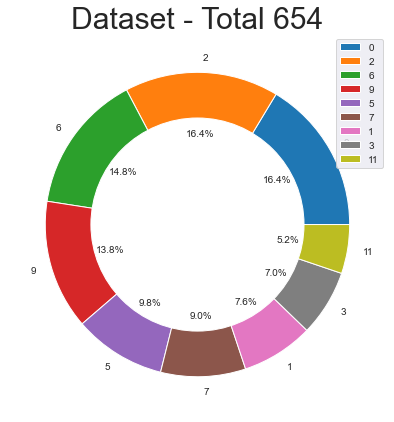

In [9]:
df_balanced = ProcessingData.balancedData(df, 'Classe', 107)
#df_balanced = df

In [10]:
ProcessingData.showLabelsQtd(df_balanced, 'Classe')


Quantidade de itens nas 9 categorias:
0     107
2     107
6      97
9      90
5      64
7      59
1      50
3      46
11     34
Name: Classe, dtype: int64


In [11]:
#Colocando a coluna 'Classe' na primeira posição
col = ['Classe'] + [c for c in range(n_comp)]
df_balanced = df_balanced[col]
df_balanced.head()

,Classe,0,1,2,3,4,5,6,7,8,...,155,156,157,158,159,160,161,162,163,164
1112,0,5.050851,-3.437326,0.880903,1.284616,1.039539,0.332499,-0.112654,-0.929544,0.185957,...,0.019806,0.001510,0.035709,0.155973,0.003866,0.022848,-0.123764,0.038916,-0.100107,-0.123967
904,0,-4.744892,-1.090630,-1.894263,0.623459,0.556025,0.847031,-0.458654,0.282898,0.140678,...,0.043572,0.045965,-0.030217,-0.043585,-0.017767,-0.008138,0.092241,0.021004,0.034693,-0.006921
1018,0,-0.894416,1.380315,0.817547,0.487481,-3.652643,-0.308384,0.959425,0.111086,-0.468956,...,-0.256595,0.197848,0.013227,-0.237661,-0.262997,-0.049325,-0.417490,0.080395,-0.168219,-0.068751
294,0,5.585781,-3.418598,1.011767,1.184437,1.192173,0.112080,-0.042108,-0.783191,-0.261409,...,-0.041518,0.035651,-0.066286,0.114607,-0.020250,-0.000785,-0.010801,0.070342,-0.082937,-0.045024
1355,0,4.773488,0.741391,-3.426230,0.476568,-1.845094,-0.454420,1.943682,-1.763280,-0.361983,...,0.142759,-0.266644,-0.237882,-0.136122,-0.262502,-0.090753,0.157790,-0.079436,0.123776,0.007879


<H2>Aplicação do One Hot Encode

In [12]:
n_classes = len(df_balanced['Classe'].astype(int).value_counts())

datas = df_balanced.iloc[:, 1:].values

enc = preprocessing.OneHotEncoder()
labels = df_balanced.Classe.to_list()
labels = [[la] for la in labels]
enc.fit(labels)
labels_hot = enc.transform(labels).toarray()

<H3>Separando os dados para teste e treino

In [13]:
X_train, X_test, y_train, y_test = train_test_split(datas, labels_hot, test_size=.3, random_state=0)#, stratify=labels)
y_train = np.array(y_train) 
y_test = np.array(y_test) 

<H3>Modelo da rede neural utilizada

In [14]:
model = Sequential()
model.add(Dense(380, activation='relu', input_dim=n_comp))
model.add(Dense(160, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

callbacks = [EarlyStopping(monitor='val_accuracy', patience=25),
        ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)]



history = model.fit(X_train, y_train, epochs=200, callbacks=callbacks, validation_data=(X_test, y_test), verbose=1)
model.load_weights('best_model.h5')

Epoch 1/200
15/15 [==============================] - 3s 80ms/step - loss: 1.8873 - accuracy: 0.3545 - val_loss: 1.5123 - val_accuracy: 0.5431
Epoch 2/200
15/15 [==============================] - 0s 18ms/step - loss: 1.2866 - accuracy: 0.6193 - val_loss: 1.1683 - val_accuracy: 0.6244
Epoch 3/200
15/15 [==============================] - 0s 18ms/step - loss: 0.9224 - accuracy: 0.7199 - val_loss: 1.0360 - val_accuracy: 0.6701
Epoch 4/200
15/15 [==============================] - 0s 23ms/step - loss: 0.6845 - accuracy: 0.8074 - val_loss: 0.8778 - val_accuracy: 0.7360
Epoch 5/200
15/15 [==============================] - 0s 13ms/step - loss: 0.5090 - accuracy: 0.8665 - val_loss: 0.8613 - val_accuracy: 0.7360
Epoch 6/200
15/15 [==============================] - 0s 26ms/step - loss: 0.4169 - accuracy: 0.8818 - val_loss: 0.7487 - val_accuracy: 0.7868
Epoch 7/200
15/15 [==============================] - 0s 22ms/step - loss: 0.3344 - accuracy: 0.9081 - val_loss: 0.7932 - val_accuracy: 0.7919
Epoch 

<h3>Avaliação do modelo</h3>
<li>Histórico da evolução do modelo e sua Loss function</li>
<li>Acurácia do modelo nos dados de teste</li>
<li>Matriz de confução</li>


In [15]:
def plot_confusion_matrix(y_test, y_pred, labels, normalize=False):
    cm = confusion_matrix(y_test, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.gcf().set_size_inches(17, 11)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [16]:
def evaluate_model(model, history, X_test, y_test):
    scores = model.evaluate((X_test), y_test, verbose=0)
    print('=========================================')
    print("|| Accuracy: %.2f%%" % (scores[1]*100))
    print('=========================================')

    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title("Accuracy")
    axs[0].legend(['Training', 'Validation'])
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title("Model- Loss")
    axs[1].legend(['Training', 'Validation'])
    fig.tight_layout()

|| Accuracy: 84.77%


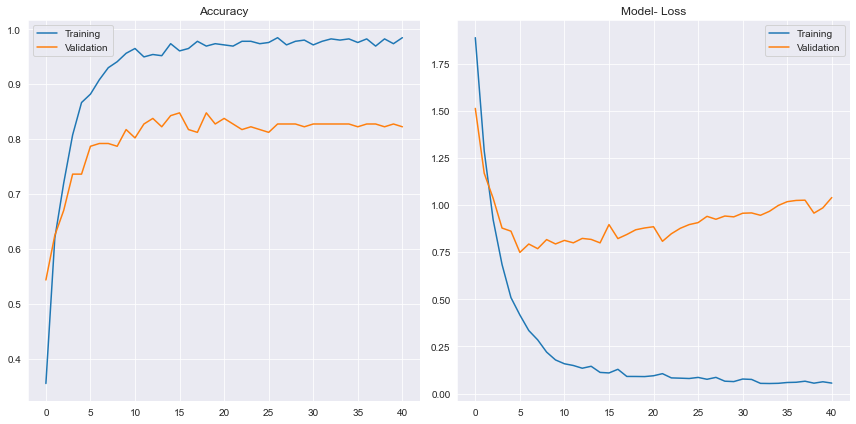

In [17]:
evaluate_model(model, history, X_test, y_test)

<h4>OBS: O valores numéricos das classes não correspondem mais com os apresentados no inicio do arquivo

Normalized confusion matrix


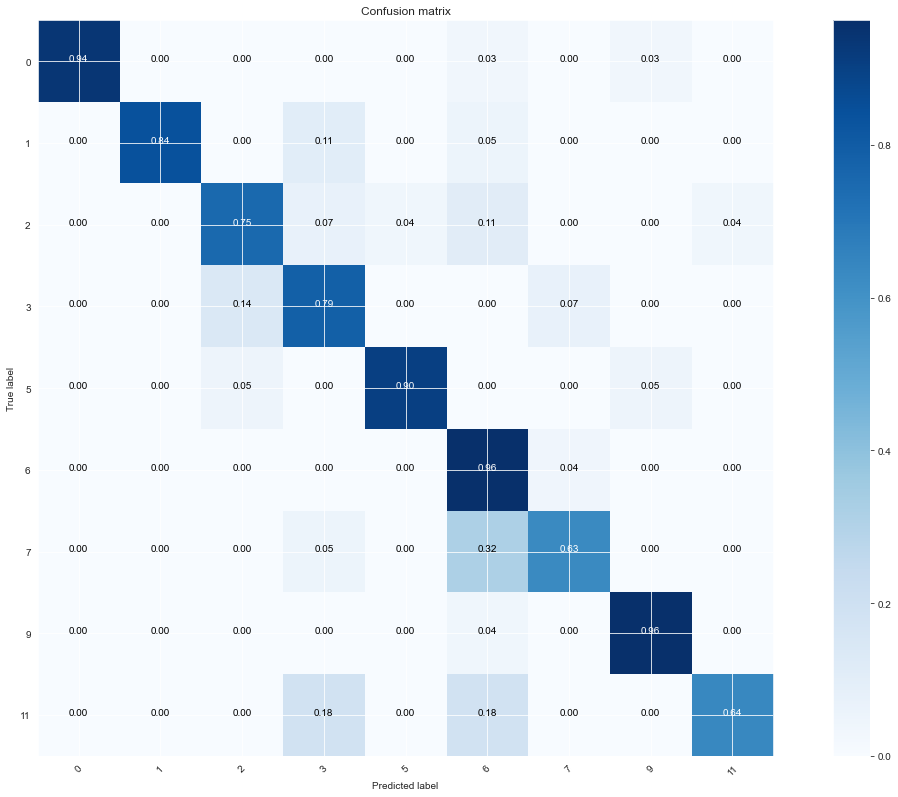

In [18]:
def find_class(probl):
    probl_max = probl.max()
    label = int(np.where(probl == probl_max)[0])

    return  label, round(probl_max*100,1)

prediction_proba = model.predict(X_test)

prediction_cat = [find_class(c)[0] for c in prediction_proba]
y_test_label =  [find_class(c)[0] for c in y_test]


plot_confusion_matrix(y_test_label, prediction_cat, enc.categories_[0], True)

<H3>Área Sob a Curva ROC</h3>
<p>Geralmente, a sensibilidade e a especificidade são características difíceis de conciliar, isto é, é complicado aumentar <br>a sensibilidade e a especificidade de um teste ao mesmo tempo. As curvas ROC (receiver operator characteristic curve) <br>são uma forma de representar a relação, normalmente antagónica, entre a sensibilidade e a especificidade de um teste<br> diagnóstico quantitativo, ao longo de um contínuo de valores de "cutoff point".

In [19]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], prediction_proba[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), prediction_proba.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

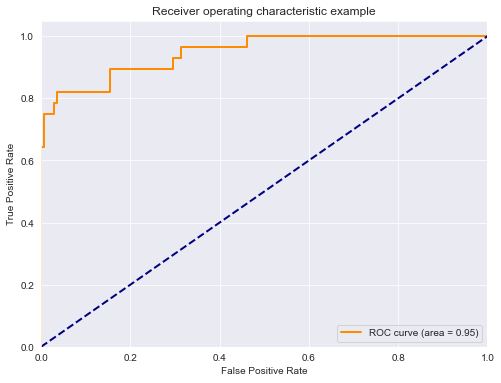

In [20]:
plt.figure(figsize=(8,6))
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


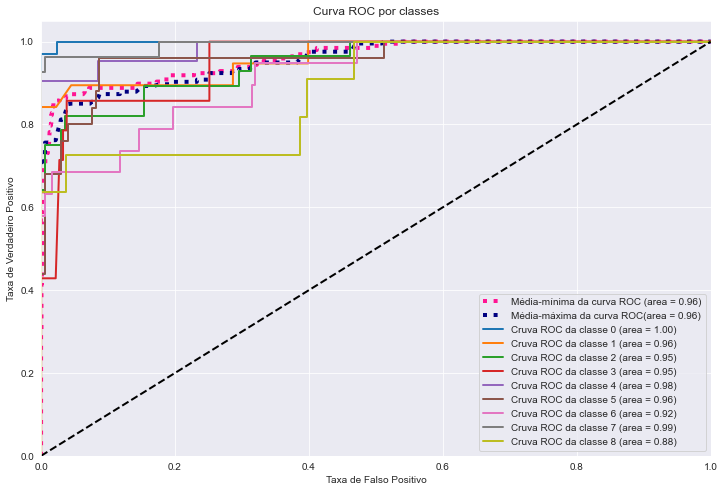

In [21]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,8))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="Média-mínima da curva ROC (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="Média-máxima da curva ROC(area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=lw,
        label="Cruva ROC da classe {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.title("Curva ROC por classes")
plt.legend(loc="lower right")
plt.show()